In [271]:
import pandas as pd
import io
file = pd.read_csv('DEEP_BREATHING_90.csv', sep=';')

channel_one = np.float_(file.CH1.tolist())
channel_two = np.float_(file.CH2.tolist())
channel_three = np.float_(file.PPG.tolist())

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

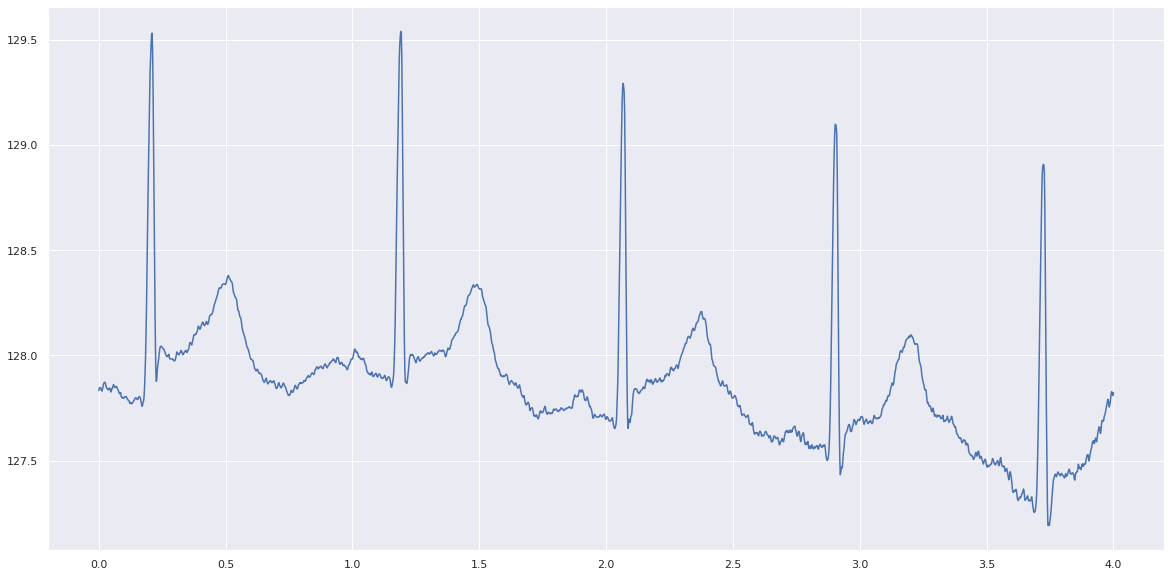

In [274]:
sample_rate = 500
samples = 2000

channel_two = channel_two[0:samples]
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
x = np.linspace(0, samples/sample_rate, samples, endpoint=True)
ax.plot(x, channel_two)
plt.title("")
plt.show()

In [312]:
from scipy.signal import butter, lfilter, lfilter_zi

def butter_bandpass_filter_zi(data, lowcut, highcut, sample_rate, order=2):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    zi = lfilter_zi(b, a)
    y, zo = lfilter(b, a, data, zi=zi*data[0])
    return y

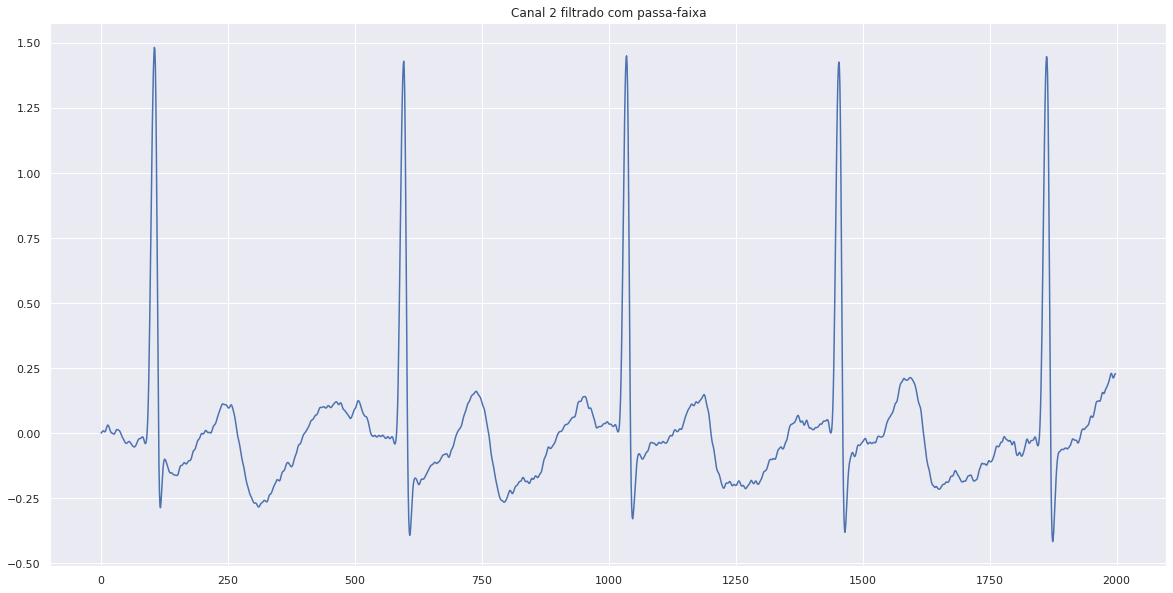

In [316]:
lowcut = 1
highcut = 40

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(butter_bandpass_filter_zi(channel_two, lowcut, highcut, sample_rate)[1:10000])
plt.title("Canal 2 filtrado com passa-faixa")
plt.show()